In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [22]:
patient_dev_smote_pca95 = pd.read_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_smote_pca95.pkl')
patient_X_dev_smote_pca95 = patient_dev_smote_pca95.drop(columns='hospital_death')
patient_y_dev_smote_pca95 = pd.DataFrame(patient_dev_smote_pca95['hospital_death'], index = patient_dev_smote_pca95.index)

patient_test_smote_pca95 = pd.read_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/test_smote_pca95.pkl')
patient_X_test_smote_pca95 = patient_test_smote_pca95.drop(columns='hospital_death')
patient_y_test_smote_pca95 = pd.DataFrame(patient_test_smote_pca95['hospital_death'], index = patient_test_smote_pca95.index)

# patient_dev_os_pca95 = pd.read_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_os_pca95.pkl')
# patient_X_dev_os_pca95 = patient_dev_os_pca95.drop(columns='hospital_death')
# patient_y_dev_os_pca95 = pd.DataFrame(patient_dev_os_pca95['hospital_death'], index = patient_dev_os_pca95.index)


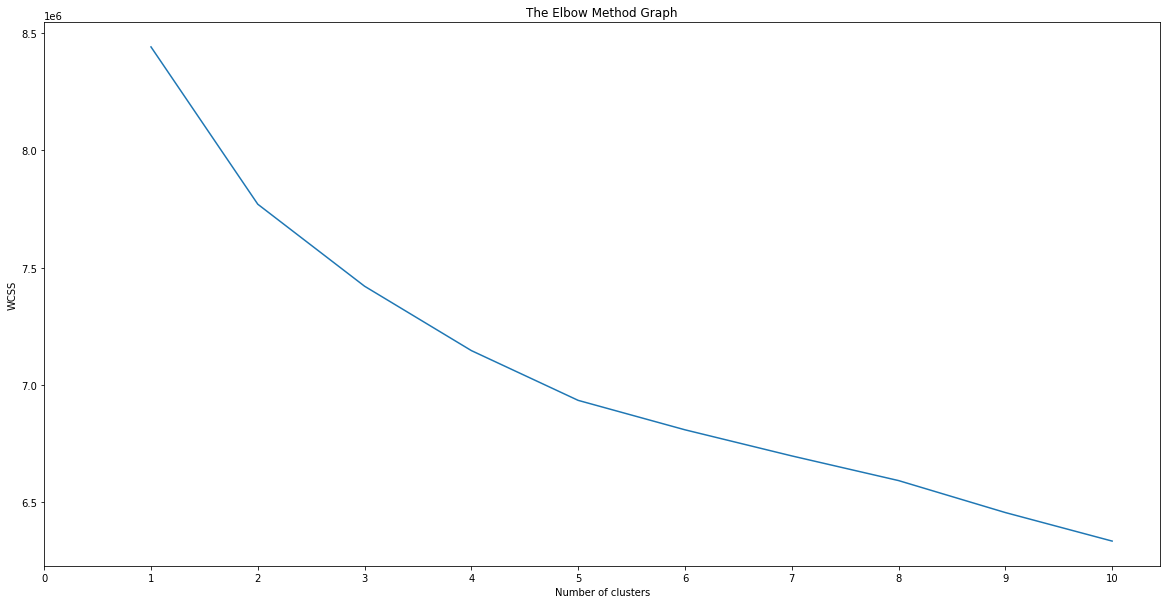

In [14]:
wcss=[]
plt.rcParams["figure.figsize"] = (20,10)
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=100, n_init=10,random_state=42)
     kmeans.fit(patient_X_dev_smote_pca95)
     wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('WCSS')
plt.show()

From the graph above, we determine the clusters number as 5.

In [19]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = pd.DataFrame(kmeans.fit_predict(patient_X_dev_smote_pca95), 
    index = patient_X_dev_smote_pca95.index)



patient_dev_smote_pca95_kmeans = patient_X_dev_smote_pca95.copy()
patient_dev_smote_pca95_kmeans['cluster'] = y_kmeans
patient_dev_smote_pca95_kmeans['hospital_death'] = patient_y_dev_smote_pca95
patient_dev_smote_pca95_kmeans.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_smote_pca95_kmeans.pkl')

0.046229019203799786